# package

In [57]:
%matplotlib inline
import networkx as nx
import pandas as pd
import numpy as np

# loading network

## string

In [58]:
#write gene list
network_file_dir = r'../../../master_research/data/STRING10_network_process_GeneSymbol.txt'
network_file = open(network_file_dir,mode='rb')
network = nx.read_weighted_edgelist(network_file,create_using=nx.DiGraph())

In [59]:
node = list(network.nodes)
print(len(node))
print(node[:10])

17351
['ARF5', 'CFTR', 'CYP51A1', 'RALA', 'DVL2', 'OSBPL7', 'LRRC23', 'DYRK4', 'PPP5C', 'NME1']


In [60]:
print(len(network.edges))
print(nx.info(network))

7238712
Name: 
Type: DiGraph
Number of nodes: 17351
Number of edges: 7238712
Average in degree: 417.1928
Average out degree: 417.1928


## LCC

### LCC v10

In [61]:
network_undirected = network.to_undirected()
LCC10 = max(nx.connected_components(network_undirected), key=len)

In [62]:
print(type(LCC10))
print(len(LCC10))

<class 'set'>
17351


In [63]:
number = 0
node_not_in_large_cc = []
for i in node:
    if i not in LCC10:
        number += 1
        node_not_in_large_cc.append(i)
print(number)

0


In [64]:
for k in node:
    if k in node_not_in_large_cc:
        network.remove_node(k)
print(nx.info(network))

Name: 
Type: DiGraph
Number of nodes: 17351
Number of edges: 7238712
Average in degree: 417.1928
Average out degree: 417.1928


# analysis character of network

## weight filter

In [65]:
network_test = network.copy()
for (u, v, wt) in network.edges.data('weight'):
    if wt < 0.7:
        network_test.remove_edge(u, v)
print(nx.info(network_test))

Name: 
Type: DiGraph
Number of nodes: 17351
Number of edges: 508930
Average in degree:  29.3315
Average out degree:  29.3315


## largest connected conponent

In [66]:
network_test_undirect = network_test.to_undirected()
largest_cc_test = max(nx.connected_components(network_test_undirect), key=len)

In [67]:
print(len(largest_cc_test))

13911


In [68]:
node_not_in_large_cc = []
for i in node:
    if i not in largest_cc_test:
        node_not_in_large_cc.append(i)
for k in node:
    if k in node_not_in_large_cc:
        network_test.remove_node(k)
print(nx.info(network_test))

Name: 
Type: DiGraph
Number of nodes: 13911
Number of edges: 508585
Average in degree:  36.5599
Average out degree:  36.5599


## write output file (filtered network with largest connected component)

In [142]:
nx.write_weighted_edgelist(network_test, "../data/network_07.txt",delimiter='\t')

In [141]:
node = network_test.nodes
gene_node_list_dir = '../../data/gene_node_list_07.txt'
with open(gene_node_list_dir,'w') as node_list:
    for i in node:
        node_list.write(i)
        node_list.write('\n')

## scale-free

### degree distribution

In [49]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

#plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True)

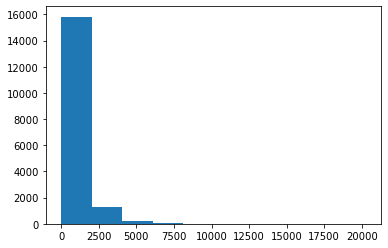

In [50]:
plot_degree_dist(network)

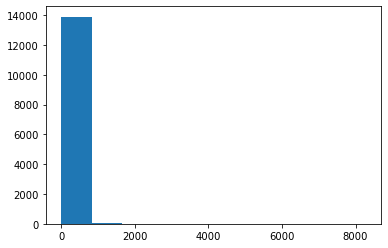

In [51]:
plot_degree_dist(network_test)

### powerlaw and plot

In [54]:
import powerlaw
import matplotlib.pyplot as plt
%matplotlib inline
def plot_degree_distribution(G,confidence = None):
    degree_freq = nx.degree_histogram(G)
    degrees = range(len(degree_freq))
    fit = powerlaw.Fit(degree_freq,xmin=1,discrete=True)
    fit.power_law.plot_pdf(color= 'b',linestyle='--',label='fit ccdf')
    fit.plot_pdf( color= 'b')
    plt.figure(figsize=(12, 8)) 
    for m in degrees:
        plt.loglog(degrees[m:], degree_freq[m:],'ro') 
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)
    save_path = '../../data/picture/'
    if confidence == None:
        fig_name = 'network_degree_distribution.png'
    else:
        fig_name = 'networkv10_'+ str(confidence) + '_degree_distribution.png'
    figure_path = save_path + fig_name
    plt.savefig(figure_path, dpi=200)
    plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values


KeyboardInterrupt: 

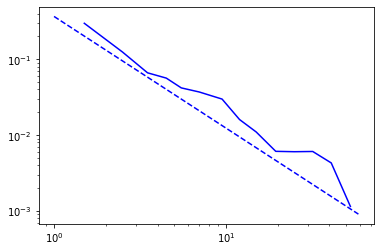

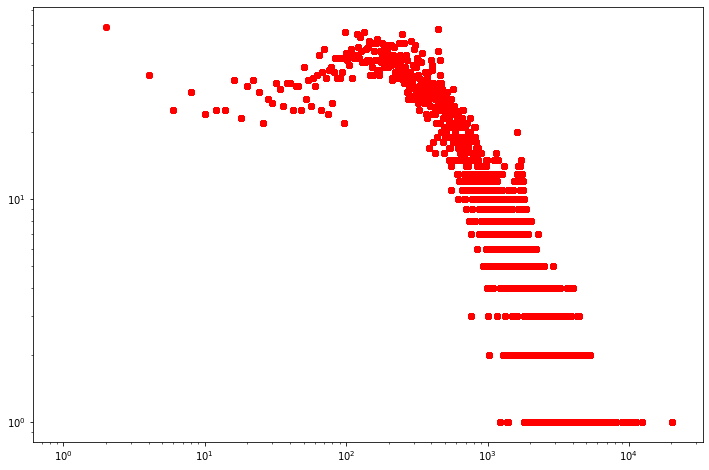

In [55]:
plot_degree_distribution(network)

Values less than or equal to 0 in data. Throwing out 0 or negative values


alpha=  1.3641740146460686   sigma=  0.01983782265137192


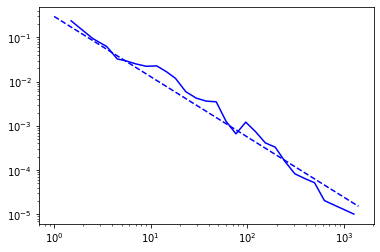

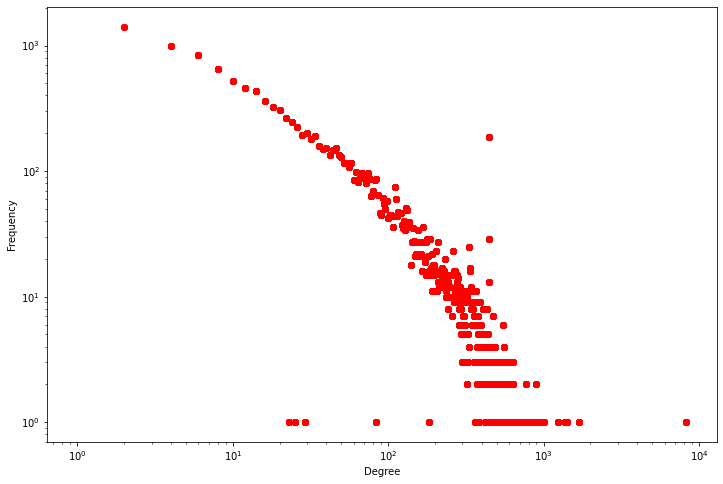

In [56]:
plot_degree_distribution(network_test,confidence=0.700)

Name: 
Type: DiGraph
Number of nodes: 18455
Number of edges: 11150694
Average in degree: 604.2099
Average out degree: 604.2099
node not in large connected component: 0
Name: 
Type: DiGraph
Number of nodes: 18455
Number of edges: 11150694
Average in degree: 604.2099
Average out degree: 604.2099
confidence score:  0.1
alpha=  1.43146825079384   sigma=  0.009362063615608505


Values less than or equal to 0 in data. Throwing out 0 or negative values


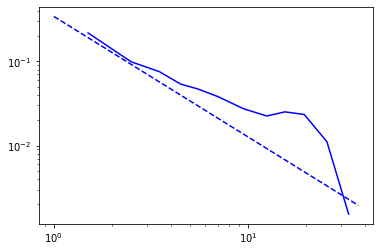

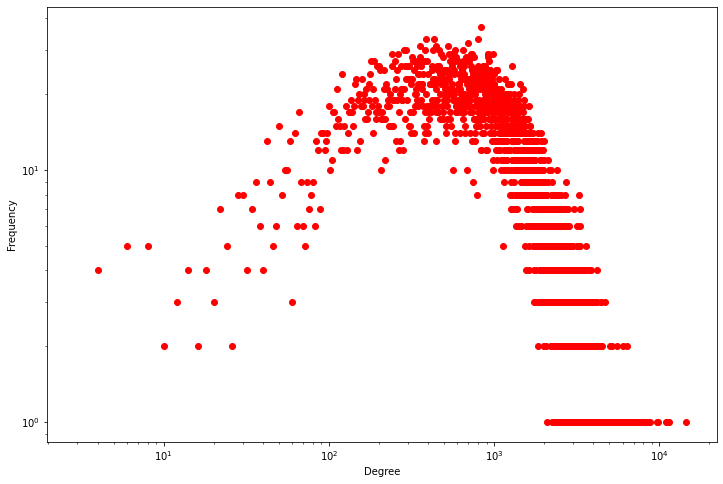

Name: 
Type: DiGraph
Number of nodes: 18455
Number of edges: 6464879
Average in degree: 350.3050
Average out degree: 350.3050
node not in large connected component: 7
Name: 
Type: DiGraph
Number of nodes: 18448
Number of edges: 6464879
Average in degree: 350.4379
Average out degree: 350.4379
confidence score:  0.2
alpha=  1.4742058794017097   sigma=  0.011007227642630844


Values less than or equal to 0 in data. Throwing out 0 or negative values


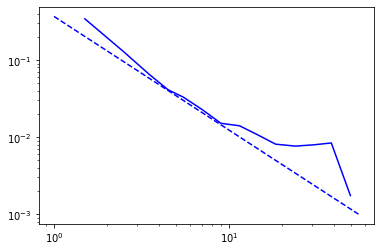

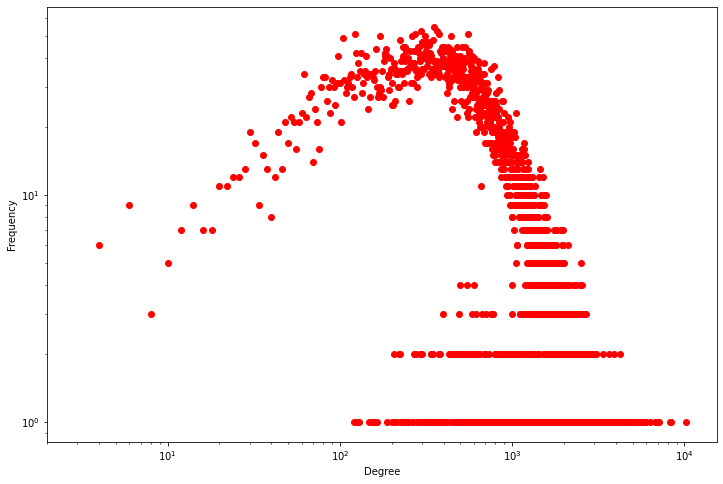

Name: 
Type: DiGraph
Number of nodes: 18455
Number of edges: 2969080
Average in degree: 160.8821
Average out degree: 160.8821
node not in large connected component: 26
Name: 
Type: DiGraph
Number of nodes: 18429
Number of edges: 2969080
Average in degree: 161.1091
Average out degree: 161.1091
confidence score:  0.3
alpha=  1.4514018207750525   sigma=  0.013219469625750283


Values less than or equal to 0 in data. Throwing out 0 or negative values


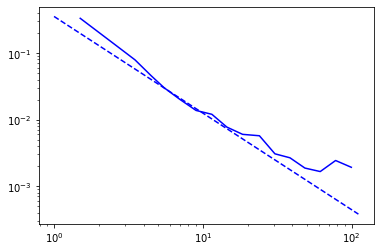

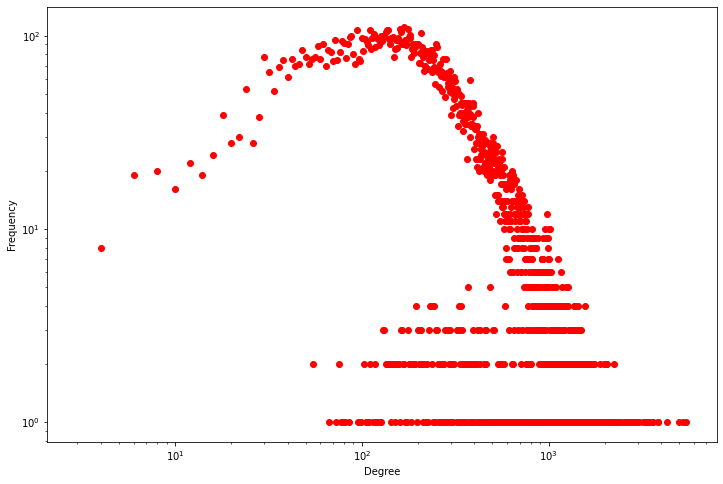

Name: 
Type: DiGraph
Number of nodes: 18455
Number of edges: 1668633
Average in degree:  90.4163
Average out degree:  90.4163
node not in large connected component: 47
Name: 
Type: DiGraph
Number of nodes: 18408
Number of edges: 1668633
Average in degree:  90.6472
Average out degree:  90.6472
confidence score:  0.4
alpha=  1.4301330479146972   sigma=  0.015122672625169253


Values less than or equal to 0 in data. Throwing out 0 or negative values


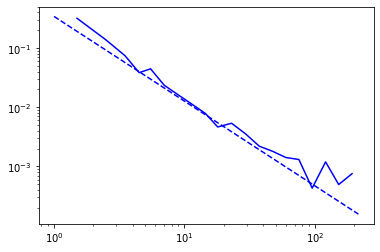

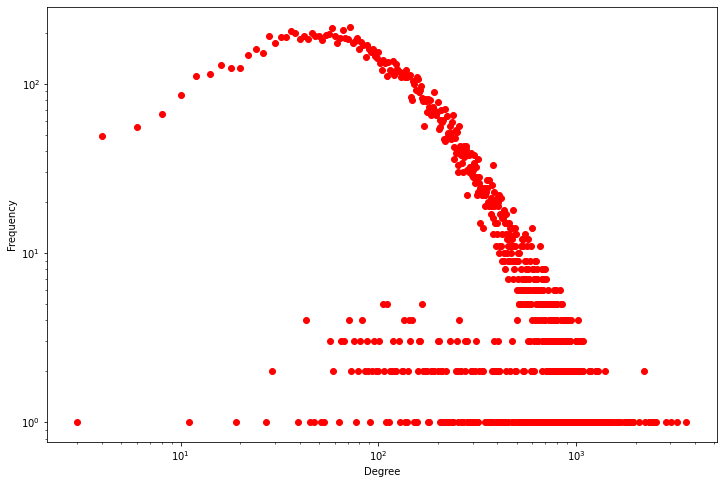

Name: 
Type: DiGraph
Number of nodes: 18455
Number of edges: 1073041
Average in degree:  58.1436
Average out degree:  58.1436
node not in large connected component: 163
Name: 
Type: DiGraph
Number of nodes: 18292
Number of edges: 1073039
Average in degree:  58.6617
Average out degree:  58.6617
confidence score:  0.5
alpha=  1.427833952282645   sigma=  0.01692484957738758


Values less than or equal to 0 in data. Throwing out 0 or negative values


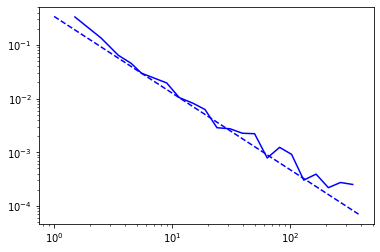

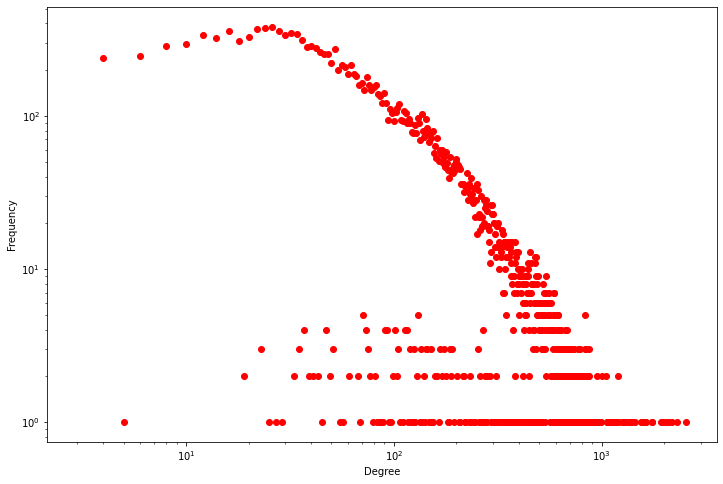

Name: 
Type: DiGraph
Number of nodes: 18455
Number of edges: 735912
Average in degree:  39.8760
Average out degree:  39.8760
node not in large connected component: 711
Name: 
Type: DiGraph
Number of nodes: 17744
Number of edges: 735881
Average in degree:  41.4721
Average out degree:  41.4721
confidence score:  0.6


Values less than or equal to 0 in data. Throwing out 0 or negative values


alpha=  1.423805411131989   sigma=  0.018496384537564005


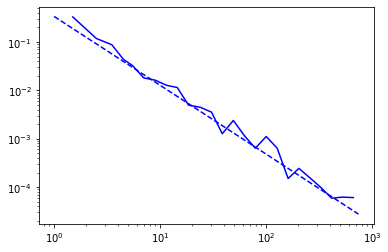

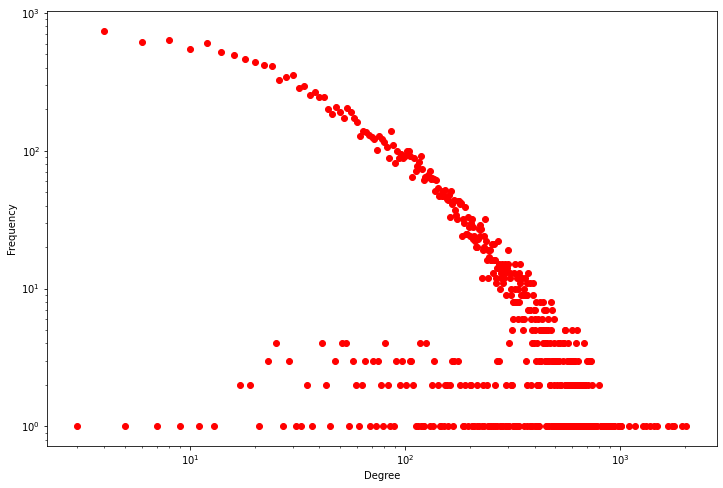

Name: 
Type: DiGraph
Number of nodes: 18455
Number of edges: 474800
Average in degree:  25.7274
Average out degree:  25.7274
node not in large connected component: 2481
Name: 
Type: DiGraph
Number of nodes: 15974
Number of edges: 474518
Average in degree:  29.7056
Average out degree:  29.7056
confidence score:  0.7
alpha=  1.4318599667767014   sigma=  0.02080196263409059


Values less than or equal to 0 in data. Throwing out 0 or negative values


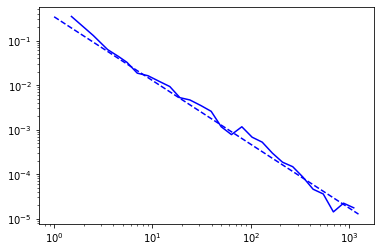

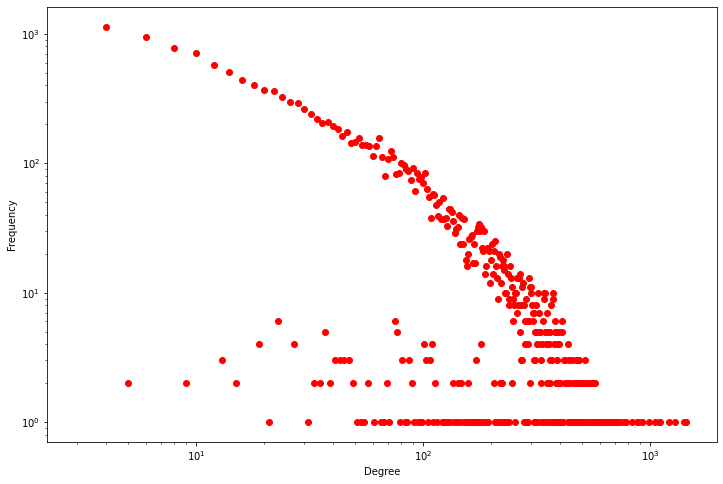

Name: 
Type: DiGraph
Number of nodes: 18455
Number of edges: 337933
Average in degree:  18.3112
Average out degree:  18.3112
node not in large connected component: 5232
Name: 
Type: DiGraph
Number of nodes: 13223
Number of edges: 337319
Average in degree:  25.5100
Average out degree:  25.5100
confidence score:  0.8
alpha=  1.411804622767447   sigma=  0.02230047060591495


Values less than or equal to 0 in data. Throwing out 0 or negative values


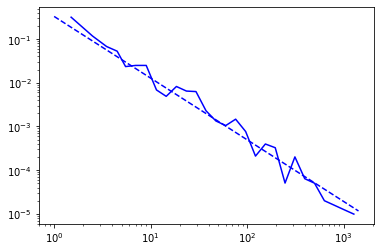

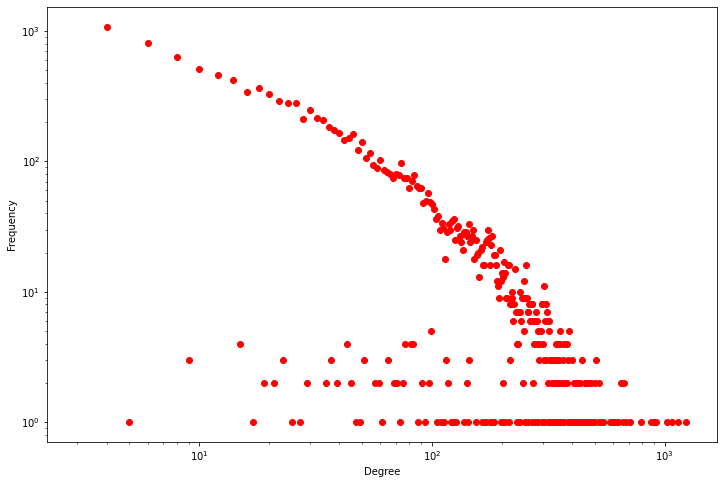

Name: 
Type: DiGraph
Number of nodes: 18455
Number of edges: 218159
Average in degree:  11.8211
Average out degree:  11.8211
node not in large connected component: 7567
Name: 
Type: DiGraph
Number of nodes: 10888
Number of edges: 217494
Average in degree:  19.9756
Average out degree:  19.9756
confidence score:  0.9
alpha=  1.3969906065083737   sigma=  0.025158257457477705


Values less than or equal to 0 in data. Throwing out 0 or negative values


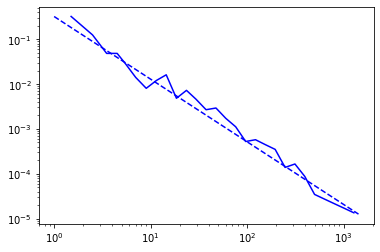

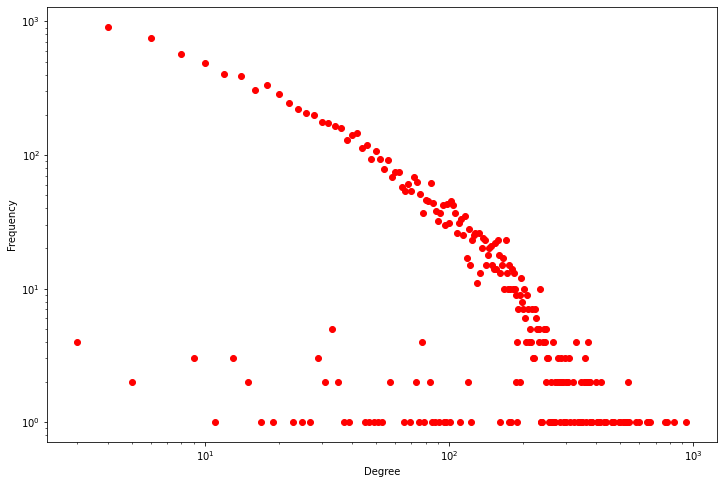

In [129]:
confidence_list = range(1,10)
for confidence in confidence_list:
    network_tmp  = network.copy()
    confidence = confidence/10
    for (u, v, wt) in network.edges.data('weight'):
        if wt <= confidence:
            network_tmp.remove_edge(u, v)
    print(nx.info(network_tmp))
    network_tmp_undirected = network_tmp.to_undirected()
    largest_cc_tmp = max(nx.connected_components(network_tmp_undirected), key=len)
    node_not_in_large_cc_tmp = []
    for i in node:
        if i not in largest_cc_tmp:
            node_not_in_large_cc_tmp.append(i)
    print('node not in large connected component:' ,len(node_not_in_large_cc_tmp))
    for k in node:
        if k in node_not_in_large_cc_tmp:
            network_tmp.remove_node(k)
    print(nx.info(network_tmp))
    print('confidence score: ', str(confidence))
    plot_degree_distribution(network_tmp,confidence=confidence)

# write node list output file

In [ ]:
gene_node_list_dir = '../data/gene_node_list.txt'
with open(gene_node_list_dir,'w') as node_list:
    for i in node:
        node_list.write(i)
        node_list.write('\n')